## Analyze A/B Test Results

You may either submit your notebook through the workspace here, or you may work from your local machine and submit through the next page.  Either way assure that your code passes the project [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).  **Please save regularly.**

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [3]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [4]:
df = pd.read_csv('ab_data.csv')
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the cell below to find the number of rows in the dataset.

In [5]:
df.shape[0]

294478

c. The number of unique users in the dataset.

In [6]:
df['user_id'].nunique()

290584

d. The proportion of users converted.

In [7]:
df[df['converted'] == 1]['user_id'].nunique() / df['user_id'].nunique()

0.12104245244060237

e. The number of times the `new_page` and `treatment` don't match.

In [8]:
df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3893 entries, 22 to 294331
Data columns (total 5 columns):
user_id         3893 non-null int64
timestamp       3893 non-null object
group           3893 non-null object
landing_page    3893 non-null object
converted       3893 non-null int64
dtypes: int64(2), object(3)
memory usage: 182.5+ KB


f. Do any of the rows have missing values?

No,rows are not having any missing values. As there is no null value in any row.

`2.` For the rows where **treatment** does not match with **new_page** or **control** does not match with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to figure out how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [9]:
df2 = df.drop(df[((df['group'] == 'treatment') == (df['landing_page'] == 'new_page')) == False].index)

In [10]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [11]:
df2['user_id'].nunique()

290584

b. There is one **user_id** repeated in **df2**.  What is it?

In [12]:
df_duplicated = df2
df_duplicated = df_duplicated[df_duplicated.duplicated(['user_id'], keep = False)]
df_duplicated

,user_id,timestamp,group,landing_page,converted
1899,773192,2017-01-09 05:37:58.781806,treatment,new_page,0
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


c. What is the row information for the repeat **user_id**? 

In [13]:
df_duplicated.index.get_values()

array([1899, 2893])

d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [14]:
df2.drop_duplicates(subset='user_id', keep='first', inplace=True)

`4.` Use **df2** in the cells below to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [15]:
cr = df2.query("converted== 1").count()[0]/df2['converted'].count()
cr

0.11959708724499628

b. Given that an individual was in the `control` group, what is the probability they converted?

In [16]:
cr_control = df2.query("group == 'control' and converted== 1").count()[0] / df2.query("group == 'control'").count()[0]
cr_control

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [17]:
cr_treatment = df2.query("group == 'treatment' and converted== 1").count()[0] / df2.query("group == 'treatment'").count()[0]
cr_treatment

0.11880806551510564

d. What is the probability that an individual received the new page?

In [18]:
p_chance_old_new = df2.query("landing_page == 'new_page'").count()[0] / df2.count()[0]
p_chance_old_new

0.50006194422266881

e. Consider your results from parts (a) through (d) above, and explain below whether you think there is sufficient evidence to conclude that the new treatment page leads to more conversions.

The probability for receiving the new is 50%. That in combination with the slightly higher chances for a converting user in the control group (receiving the old page) there is just little evidence that the old page leads to more conversions. However, putting a very little differences into practical perspective we can also assume, that there no difference in conversions between the old and new version of the page.

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

h0 = Pnew-Pold <= 0

h0 = Pnew-Pold > 0

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **conversion rate** for $p_{new}$ under the null? 

In [20]:
p_new = sum(df2.query("converted == '1'")['converted']) / df2.shape[0]
p_new

0.11959708724499628

b. What is the **conversion rate** for $p_{old}$ under the null? <br><br>

In [21]:
p_old = sum(df2.query("converted == '1'")['converted']) / df2.shape[0]
p_old

0.11959708724499628

In [22]:
p_new-p_old

0.0

c. What is $n_{new}$, the number of individuals in the treatment group?

In [23]:
n_new = len(df2.query("group == 'treatment'"))
n_new

145310

d. What is $n_{old}$, the number of individuals in the control group?

In [24]:
n_old = len(df2.query("group == 'control'"))
n_old

145274

e. Simulate $n_{new}$ transactions with a conversion rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [25]:
new_page_converted = np.random.binomial(n_new, p_new)
new_page_converted

17464

f. Simulate $n_{old}$ transactions with a conversion rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [26]:
old_page_converted = np.random.binomial(n_old, p_old)
old_page_converted

17503

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [27]:
(new_page_converted/n_new)-(old_page_converted/n_old)

-0.0002982408386779517

h. Create 10,000 $p_{new}$ - $p_{old}$ values using the same simulation process you used in parts (a) through (g) above. Store all 10,000 values in a NumPy array called **p_diffs**.

In [28]:
p_diffs = []
for x in range(0,10000):
    new_page_converted = np.random.binomial(n_new, p_new)
    old_page_converted = np.random.binomial(n_old, p_old)
    p_diffs.append((new_page_converted/n_new)-(old_page_converted/n_old))

p_diffs = np.array(p_diffs)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

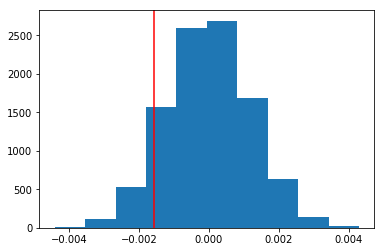

In [32]:
cr_diff = cr_treatment - cr_control
plt.hist(p_diffs);
plt.axvline(x=cr_diff, color="red");


j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [33]:
df_p_diffs = pd.DataFrame(p_diffs)
df_p_diffs.rename(index=str, columns={0:"Differences"} ,inplace=True)

df_p_diffs.query("Differences > @cr_diff").count()/df_p_diffs['Differences'].count()

Differences    0.9064
dtype: float64

k. Please explain using the vocabulary you've learned in this course what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

In j part,I have calculated the p-value. The p-value is described as the probability that the Null-Hypothesis is true. The higher the value, the larger the chance that rejecting the Alternative-Hypothesis is correct. In additon to this, p-value can be compared against the threshold-value "alpha". Alpha describes the maximum acceptable rate for type 1 errors, when deciding to accepting or rejecting the Null-Hypothesis. If the p-value is greater than the  alpha, we fail to reject the Null-Hypothesis. Here, the p-value is 0.9 of the bootstrap sample differences in conversion rate is high, given that the highest p-value can be "1". Therefore we accept that the Null-Hypothesis which is, the new page compared to the old page, performs equal or worse.

l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [52]:
import statsmodels.api as sm

convert_old = df2.query("group == 'control' and converted== 1").count()[0]
convert_new = df2.query("group == 'treatment' and converted== 1").count()[0]
n_old = len(df2.query("group == 'control'"))
n_new = len(df2.query("group == 'treatment'"))

m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](https://docs.w3cub.com/statsmodels/generated/statsmodels.stats.proportion.proportions_ztest/) is a helpful link on using the built in.

In [53]:
z_score, p_value = sm.stats.proportions_ztest([convert_new, convert_old], [n_new, n_old], alternative='larger')
#As the Null-Hypothesis states, the old page is better in terms of convertion rate, I added the parameter "alternative='larger'"'
print("z_score = " + str(z_score))
print("p_value = " + str(p_value))

z_score = -1.31092419842
p_value = 0.905058312759


In [54]:
from scipy.stats import norm

#print(norm.cdf(z_score))
# To tells us how significant the z-score is.

print(norm.ppf(1-(0.05/2)))
# To tells us what our critical value at 95% confidence is.

1.95996398454


n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

As per the z-test at 95% confidence interval, the z-score of -1.26 doesn't exceed the critical value of 1.96. We therefore fail to reject to the Null-Hypothesis. This goes along with the j and k part findings.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you achieved in the A/B test in Part II above can also be achieved by performing regression.<br><br> 

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

The 'logistic regression' will be the appropriate type of regression in this case. This regression type supports datasets with only two outcome values that is 1 and 0.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives. However, you first need to create in df2 a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [37]:
#Creating a copy of the dataset for this analysis.
df8 = df2.copy()

#Added an intercept column.
df8['intercept'] = 1

#Creating dummy variables for the landing page the user has seen.
df8[['new_page', 'old_page']] = pd.get_dummies(df['landing_page'])

#Creating dummy variables for the group the user belongs to, is not neccessary, as old_page corresponds with control-group and newapge with treatment-group.
df8.drop(['timestamp', 'group', 'landing_page', 'new_page'], axis = 1, inplace=True)
df8.rename(columns={'old_page':'ab_page'}, inplace=True)

df8.head()

,user_id,converted,intercept,ab_page
0,851104,0,1,1
1,804228,0,1,1
2,661590,0,1,0
3,853541,0,1,0
4,864975,1,1,1


c. Use **statsmodels** to instantiate your regression model on the two columns you created in part b., then fit the model using the two columns you created in part **b.** to predict whether or not an individual converts. 

In [38]:
import statsmodels.api as sm
logit_mod = sm.Logit(df8['converted'], df8[['intercept', 'ab_page']])
results = logit_mod.fit()
results.summary2()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-04 08:15 AIC:              212780.3502
No. Observations:   290584           BIC:              212801.5095
Df Model:           1                Log-Likelihood:   -1.0639e+05
Df Residuals:       290582           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
              Coef.   Std.Err.      z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept    -2.0038    0.0081  -247.1457  0.0000  -2.0197  -1.9879
ab_page       0.0150    0.0114     1.3109  0.1899  -0.0074   0.0374
==================================================================

"""

In [39]:
#Exponent coefficient for interpretations
np.exp(results.params)

intercept    0.134827
ab_page      1.015102
dtype: float64

d. Provide the summary of your model below, and use it as necessary to answer the following questions.

Seeing the p-value for ab_page we can see that this value is not near null. 
Which means, that the new landing page doesn't seem to have significant influence on the user to convert compared to the old one.
Looking at the exponentiated coefficients, we can presume that : For each unit increase in ab_page , we can expect an increase in conversion by 1.01. This goes along with the insignificant p-value. We can conclude that, The old page perform significantly better than the new page till date.

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in **Part II**?

The p-value associated with ab_page is 0.190.
In second part, Heading back to the hypothesis, we can see that the null implies no improvement by the alternative ,and the alternative implies only an increase in performance measured in the difference in conversion rate. Therefore, the setting is seen as one-sided as only the direction of improvement has been covered when stating the hypothesizes and calculating the p-value.

In part three, the setting was different, compared to part two. I applied a logistic regression, which calculates the difference in conversion rate, which either is positive or negative. The p-value covers two directions. when dividing the p-value 0.190 by 2, we go near the p-value of part two: 0.95 is near 0.89.

f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

Including other things into the regression analysis is a good idea. Other factors might explain any kind of differences in outcome better than the existing ones. Therefore changes of improvement in the results increases.

However, other factors might make the model more complex as well as the correct interpretation of the results become more difficult. Besides, you have higher chances for wrong results. 

Therefore, we have to test different scenarios,inorder to get correct results.

g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives in. You will need to read in the **countries.csv** dataset and merge together your datasets on the appropriate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [40]:
df_countries = pd.read_csv('countries.csv')
df_countries.head()

,user_id,country
0,834778,UK
1,928468,US
2,822059,UK
3,711597,UK
4,710616,UK


In [41]:
#cdf8 = df2c.merge(cdf, on='user_id', how='inner')
df8_plus_countries = df_countries.merge(df8, on='user_id', how='inner')

df8_plus_countries.head()

,user_id,country,converted,intercept,ab_page
0,834778,UK,0,1,1
1,928468,US,0,1,0
2,822059,UK,1,1,0
3,711597,UK,0,1,1
4,710616,UK,0,1,0


In [42]:
#to count the number of countries
df8_plus_countries['country'].value_counts()

US    203619
UK     72466
CA     14499
Name: country, dtype: int64

In [43]:
df8_plus_countries[['CA', 'UK', 'US']] = pd.get_dummies(df8_plus_countries['country'])
# As the order of the columns for each country matter, when creating the dummies, a quick check.
# ab_page = 1 implies that the user belongs to control group and has seen the old page.

df8_plus_countries.drop('country', axis = 1)

df8_plus_countries.head(10)


,user_id,country,converted,intercept,ab_page,CA,UK,US
0,834778,UK,0,1,1,0,1,0
1,928468,US,0,1,0,0,0,1
2,822059,UK,1,1,0,0,1,0
3,711597,UK,0,1,1,0,1,0
4,710616,UK,0,1,0,0,1,0
5,909908,UK,0,1,0,0,1,0
6,811617,US,1,1,0,0,0,1
7,938122,US,1,1,0,0,0,1
8,887018,US,0,1,0,0,0,1
9,820683,US,0,1,0,0,0,1


In [44]:
logit_mod_country = sm.Logit(df8_plus_countries['converted'], df8_plus_countries[['intercept', 'UK', 'US']])
# Leaving 'CA' column, as it has the least amount of entries in the dataset.
results_country = logit_mod_country.fit()
results_country.summary2()

Optimization terminated successfully.
         Current function value: 0.366116
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-04 08:15 AIC:              212780.8333
No. Observations:   290584           BIC:              212812.5723
Df Model:           2                Log-Likelihood:   -1.0639e+05
Df Residuals:       290581           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0375    0.0260  -78.3639  0.0000  -2.0885  -1.9866
UK             0.0507    0.0284    1.7863  0.0740  -0.0049   0.1064
US             0.0408    0.0269    1.5178  0.1291  -0.0119   0.0935
==================================================================

"""

In [45]:
#Exponentiating coefficients for interpretation
np.exp(results_country.params)

intercept    0.130350
UK           1.052027
US           1.041647
dtype: float64

The p-values for the used independent variables are all above 0.05, which suggests insignificant relationships towards the dependent variable “converted”. Therefore, we fail to reject the Null-Hypothesis.
According to this result the new landing page does not perform significantly better and the old page landing, also not when segmenting the users per country. The exponentiated coefficients speak the same language, When reading  results,for each unit increase in the value:
UK : the user is from the country UK is 1.052 times more likely to convert, holding all other variables constant.

US: the user is from the country US is 1.042 times more likely to convert, holding all other variables constant.

Lastly, The country where the user lives, does have a good amount of influence on the likelihood for converting.

h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [49]:
logit_mod_country_page = sm.Logit(df8_plus_countries['converted'], df8_plus_countries[['intercept', 'ab_page','UK', 'US']])
# Leaving 'CA'-column out, as this the value with the least amount of entries in the dataset.
results_country_page = logit_mod_country_page.fit()
results_country_page.summary2()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary2.Summary'>
"""
                          Results: Logit
==================================================================
Model:              Logit            No. Iterations:   6.0000     
Dependent Variable: converted        Pseudo R-squared: 0.000      
Date:               2021-04-04 08:18 AIC:              212781.1253
No. Observations:   290584           BIC:              212823.4439
Df Model:           3                Log-Likelihood:   -1.0639e+05
Df Residuals:       290580           LL-Null:          -1.0639e+05
Converged:          1.0000           Scale:            1.0000     
-------------------------------------------------------------------
               Coef.   Std.Err.     z      P>|z|    [0.025   0.975]
-------------------------------------------------------------------
intercept     -2.0450    0.0266  -76.8197  0.0000  -2.0971  -1.9928
ab_page        0.0149    0.0114    1.3069  0.1912  -0.0075   0.0374
UK             0.0506    0.0284    1.7835  0.0745  -0.0050   0.1063
US             0.0408    0.0269    1.5161  0.1295  -0.0119   0.0934
==================================================================

"""

The p-values of the independent variables - ab_page, UK & US in this combined setting do not exceed the 95% significance interval as they are higher than 0.05. Meaning, none of this variables appear to have significant influence on the dependent variable converted.

In [50]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Analyze_ab_test_results_notebook.ipynb'])

0